In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

### Loading dataset into dataframe

In [2]:
data = pd.read_csv('../Data/ottdata.csv')
df = data.copy()

In [3]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [4]:
df.tail()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
995,1.58,1311.96,0,Romance,Friday,Fall,48.58,0.36
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56
997,1.62,1359.80,1,Sci-Fi,Wednesday,Fall,150.44,0.66
998,2.06,1698.35,0,Romance,Monday,Summer,48.72,0.47
999,1.36,1140.23,0,Comedy,Saturday,Summer,52.94,0.49


### Shape for dataframe

In [5]:
df.shape

(1000, 8)

- The DataFrame consist of `1000` rows and `8` columns.

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


- Almost all the columns have a count of `1000` data.
- 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [8]:
df.duplicated().value_counts()

False    1000
dtype: int64

In [9]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize,)
    sns.boxplot(
        data= data, x= feature, ax= ax_box2, showmeans=True, color="navy")
    sns.histplot(
        data= data, x= feature, kde= kde, ax= ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data= data, x= feature, kde= kde, ax= ax_hist2, color="red"
    )
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )
     

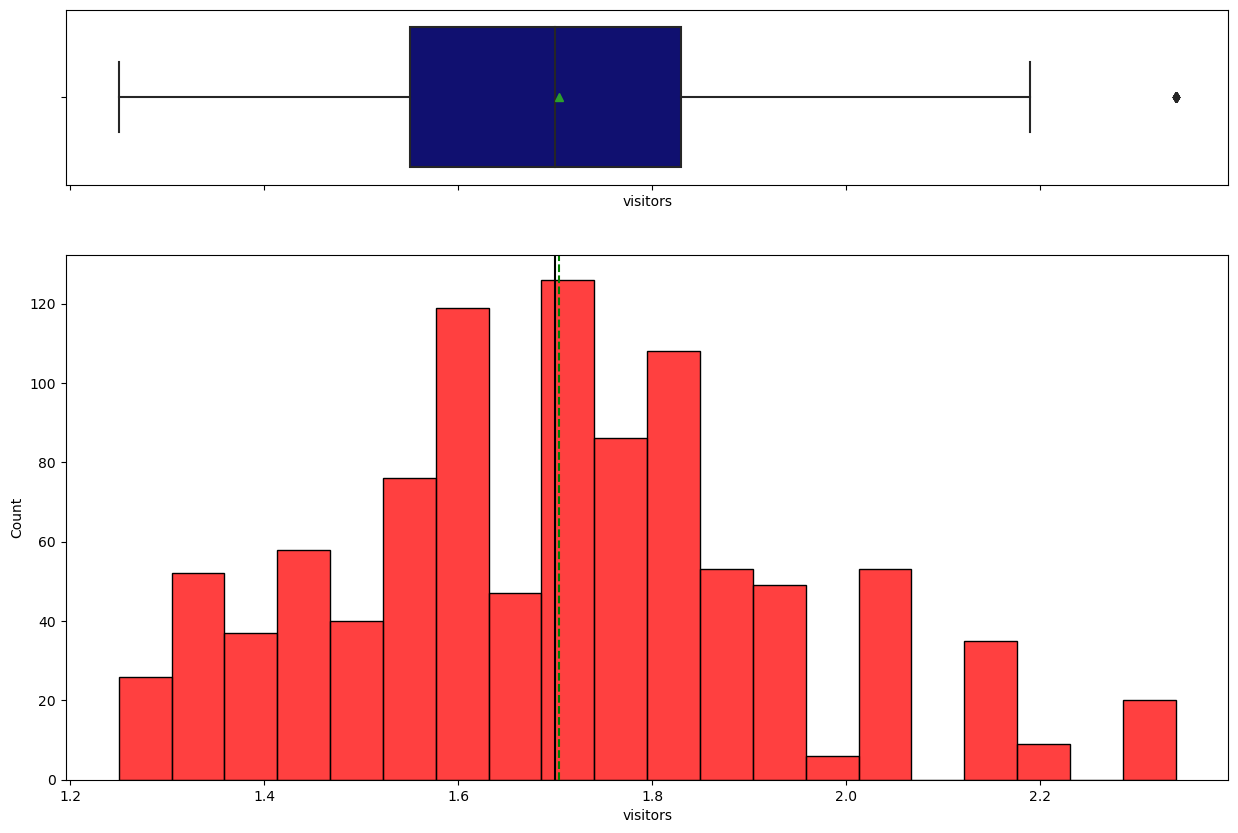

In [11]:
histogram_boxplot(data= df, feature='visitors')


- The mean value of visitors that is somewhere around 1.7 million visitors.
- Most of the data lies between 1.5 to 1.9 million visitors.

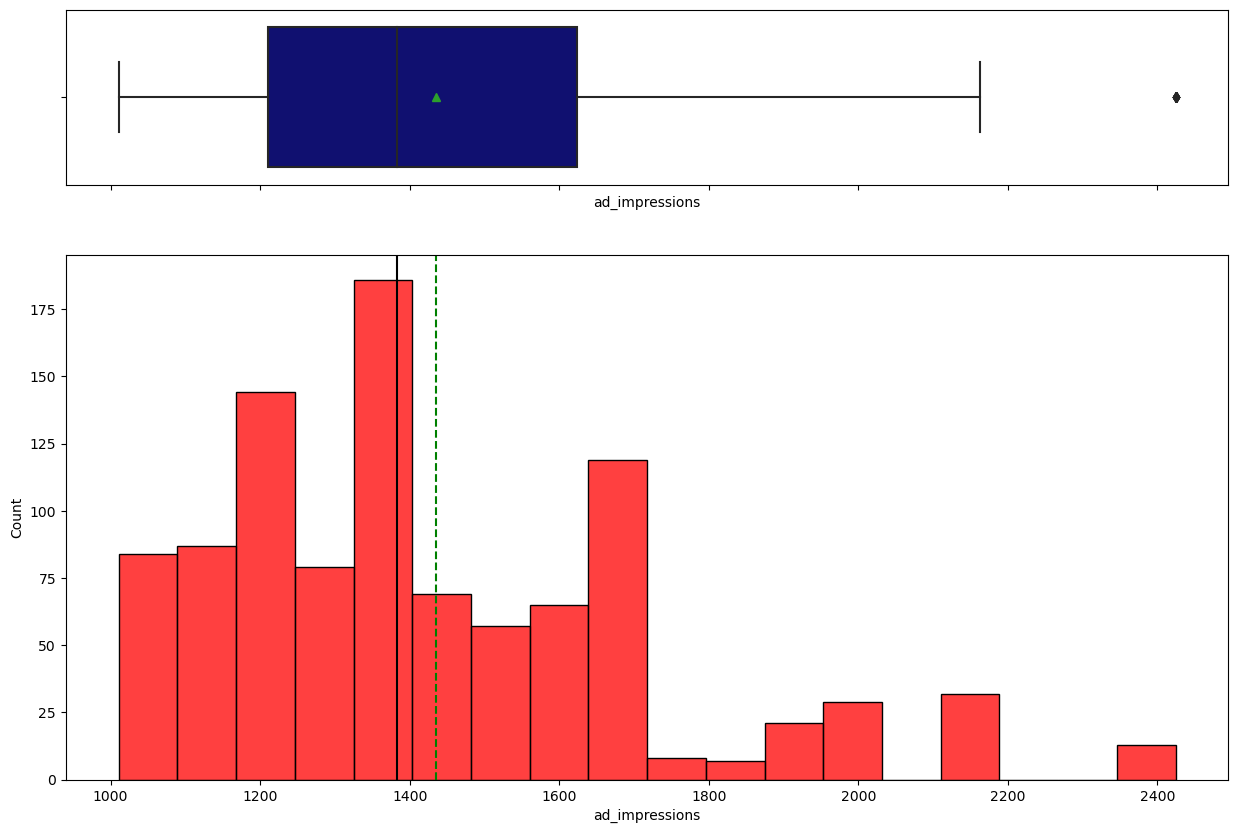

In [12]:
histogram_boxplot(feature = 'ad_impressions', data= df)

- The mean value of Ad impressions is somewhere around 1400 to 1500 million `ad_impressions`.
- Most of the data lies betwee 1200 to 1700 million `ad_imprssions`.

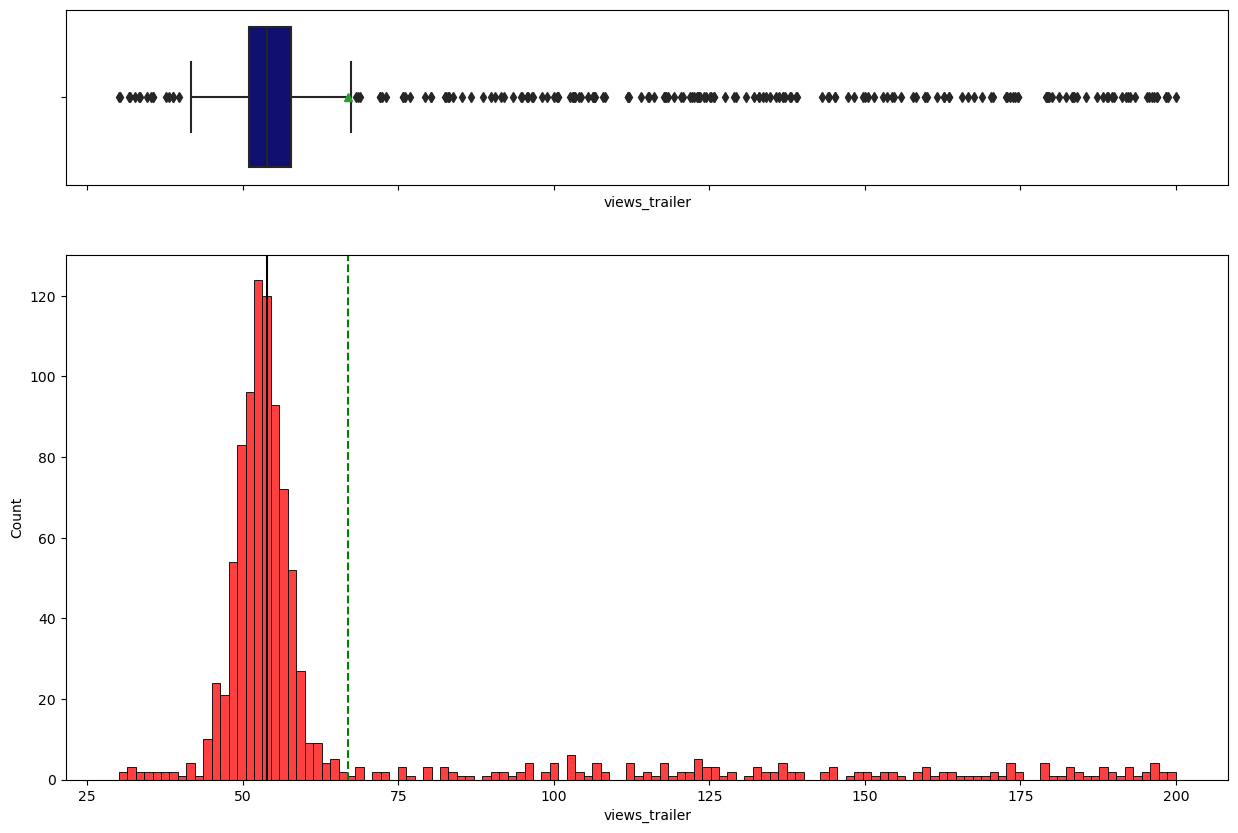

In [13]:
histogram_boxplot(feature = 'views_trailer', data = df)

- The mean value of is found somewhere betwee 60 to 75 million views.
- Most of the values lies around 50 million views.
- There are lot of outliers found in the dataset but its okay to havr 200 million views on trailer.

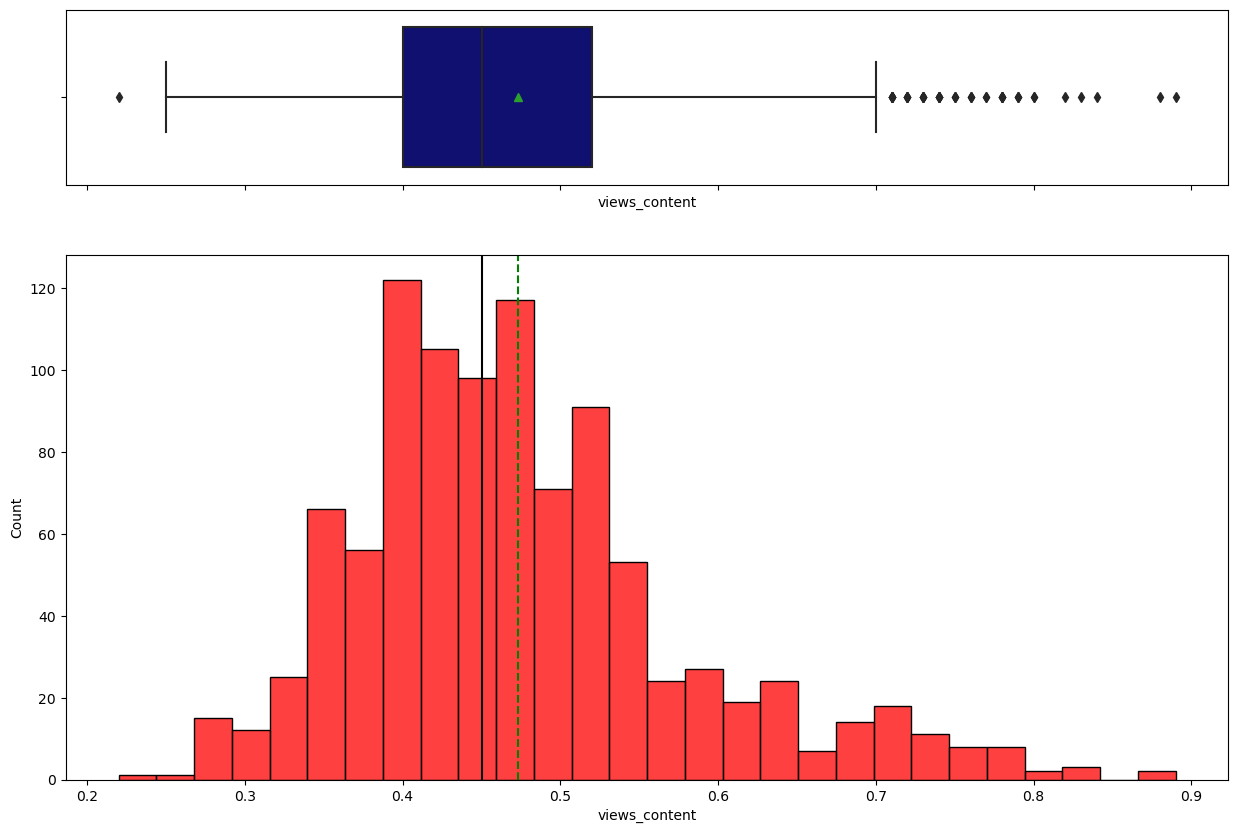

In [14]:
histogram_boxplot(feature = 'views_content', data= df)

- The mean value lies between 0.4 to 0.5 million view of the content.
- Most of the values lies between 0.4 to 0.6 million views.
- There are some of outliers present in the dataset might need to take a look on it.

In [15]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature]) 
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="coolwarm",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) 
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2 
        y = p.get_height() 

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        ) 

    plt.show()

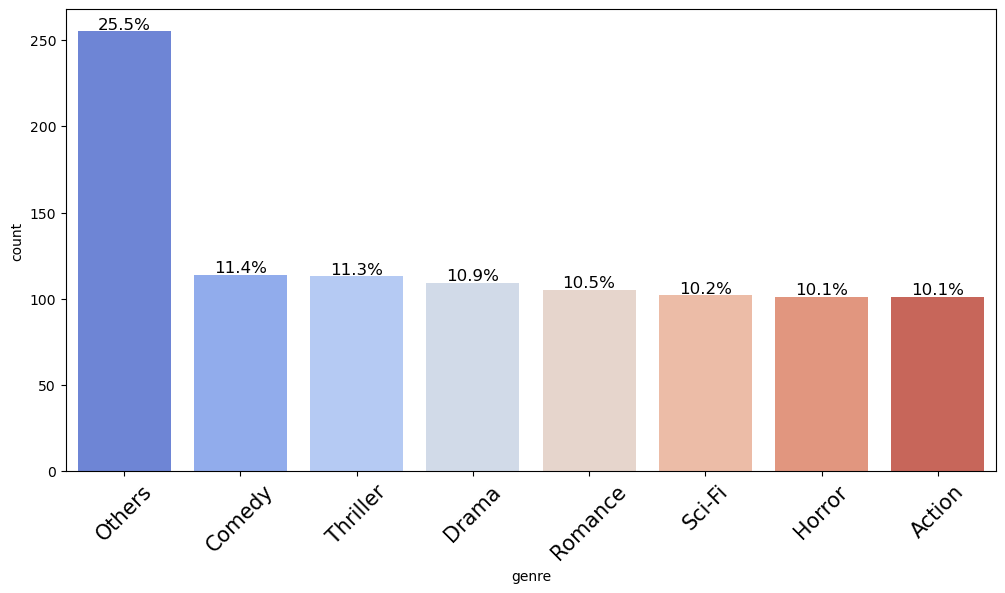

In [16]:
labeled_barplot(data = df, feature = 'genre', perc = True, n = 10)

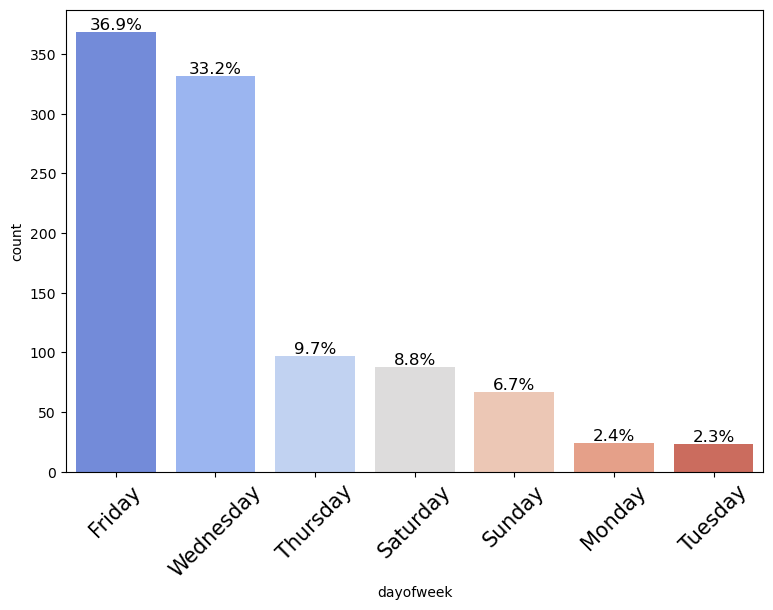

In [17]:
labeled_barplot(feature= 'dayofweek', data= df, perc = True)

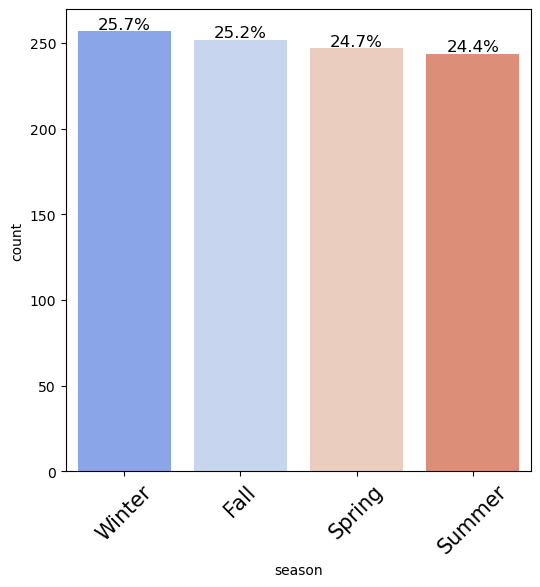

In [18]:
labeled_barplot(feature='season', data = df, perc = True)

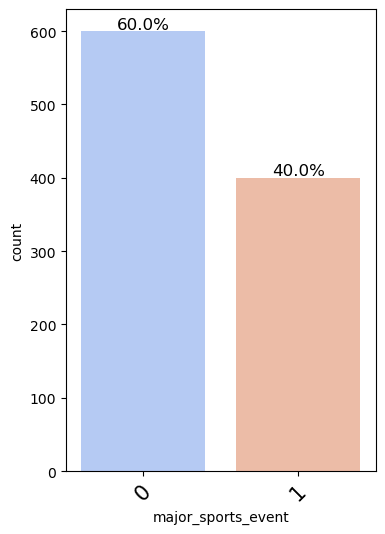

In [19]:
labeled_barplot(feature='major_sports_event', data= df, perc= True)

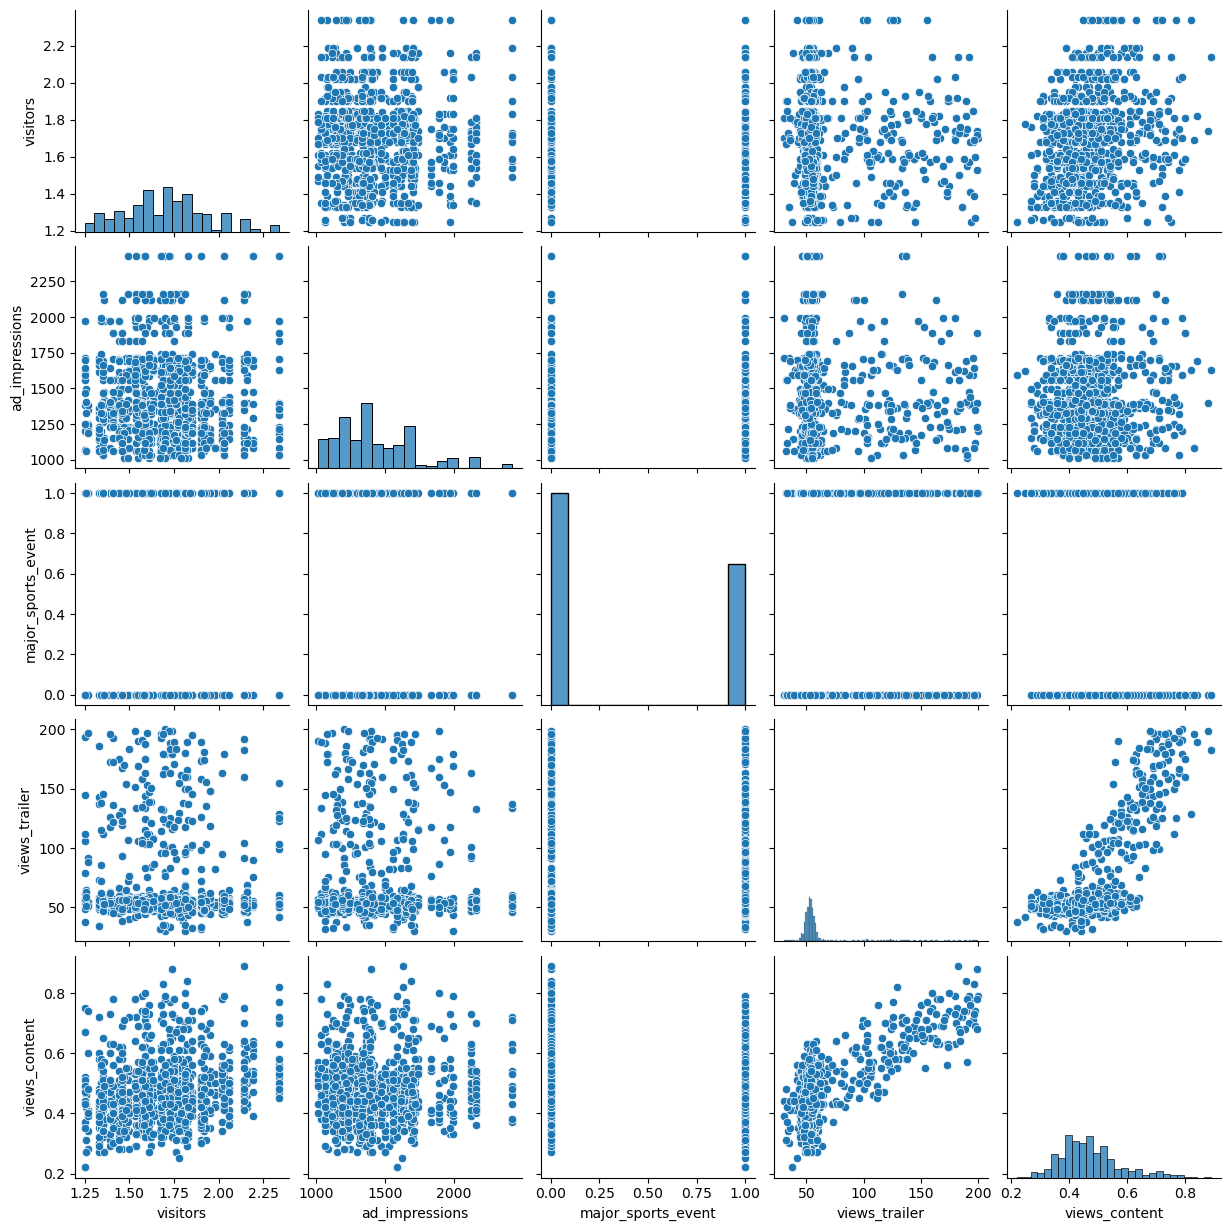

In [83]:
sns.pairplot(data= df);

C:\Users\sgopa\AppData\Local\Temp\ipykernel_5984\1755700233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= df.corr(), annot = True, cmap='coolwarm', vmin=-1, vmax=1);


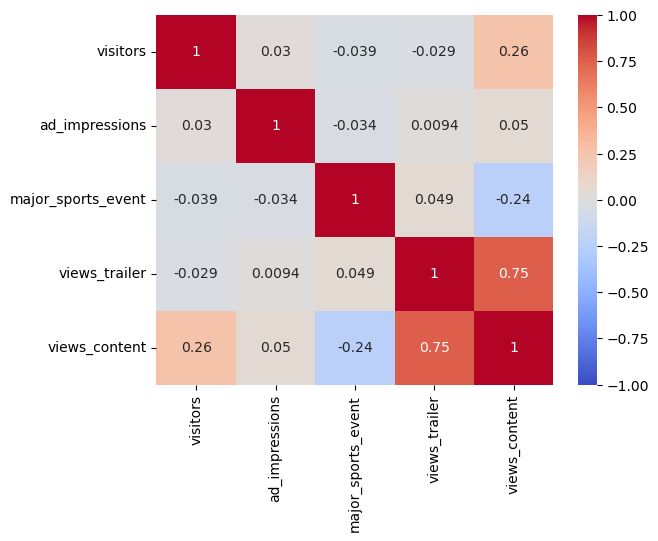

In [84]:
sns.heatmap(data= df.corr(), annot = True, cmap='coolwarm', vmin=-1, vmax=1);

- we can clearly see that the `views_trailer` and `viewws_content` are highly correlated with eachother.
- Also the content views and visitors have some correlation.
- All other values don't have much of a correlation.
- `views_content` and `major_sports_event` have some negative correlation between weachother.

<Axes: xlabel='views_content', ylabel='views_trailer'>

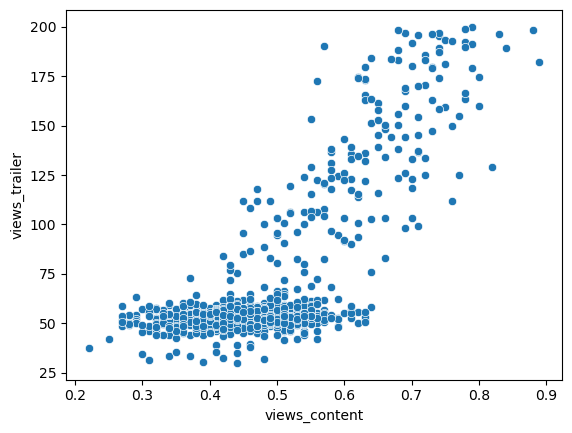

In [85]:
sns.scatterplot(x='views_content', y = 'views_trailer', data= df)

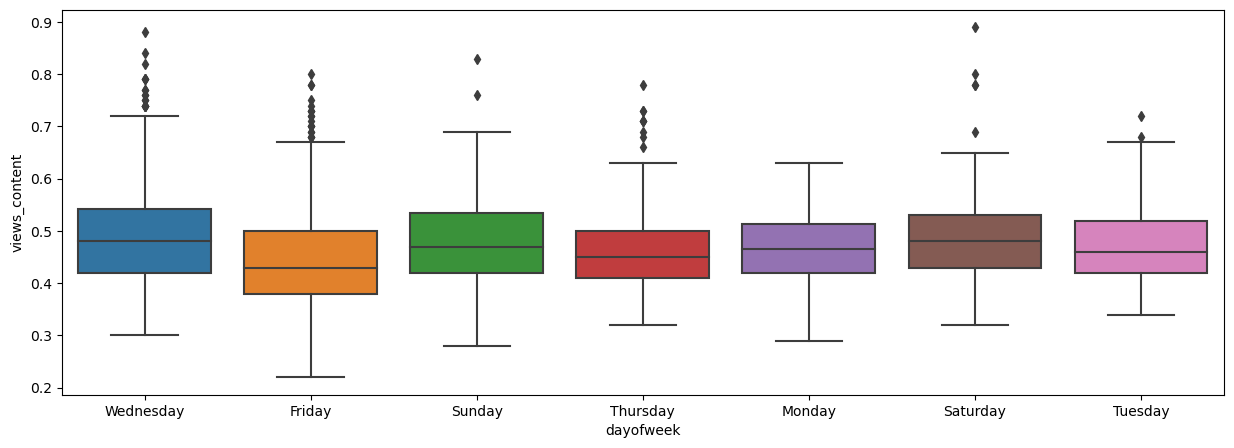

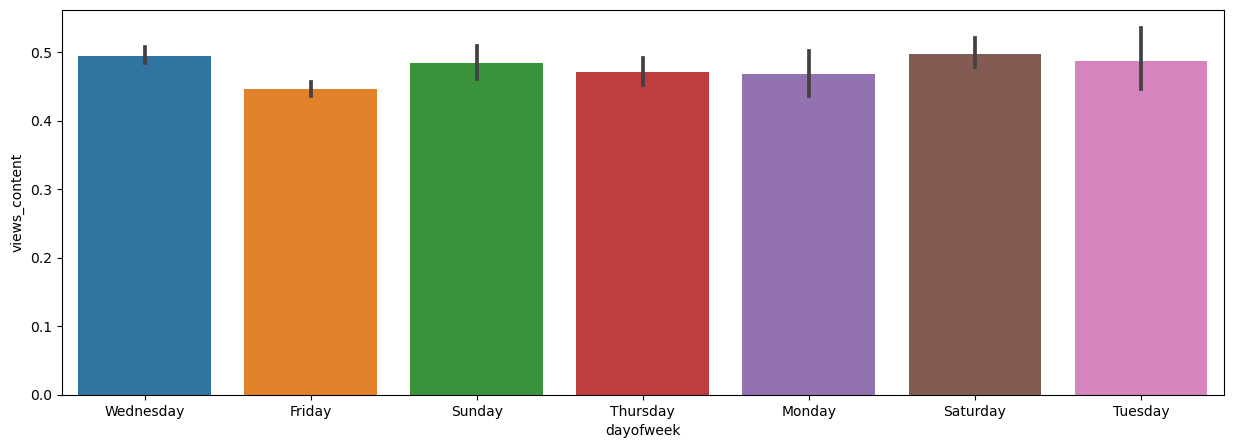

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'dayofweek', y = 'views_content', data = df);

plt.figure(figsize=(15,5))
sns.barplot(x = 'dayofweek', y = 'views_content', data = df);

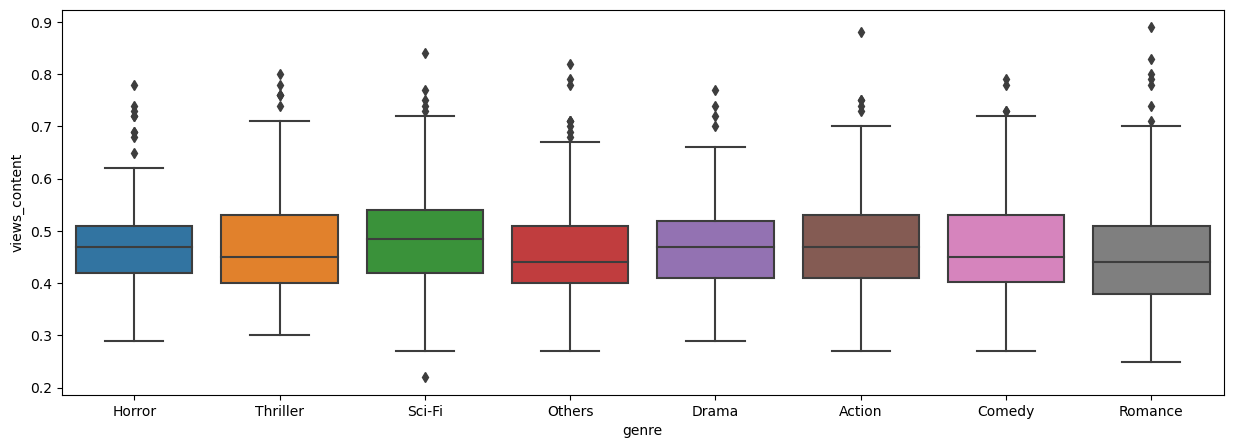

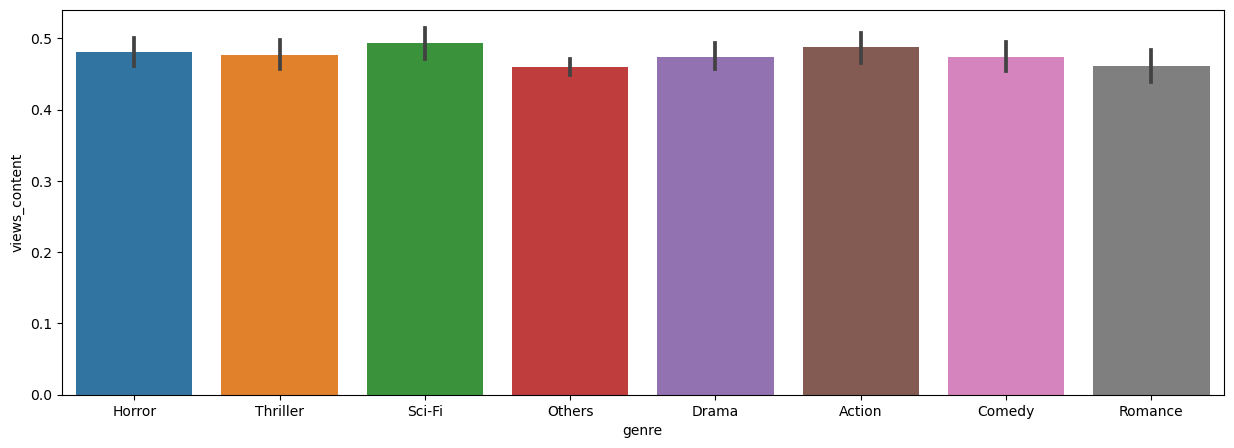

In [36]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'genre', y = 'views_content', data = df);

plt.figure(figsize=(15,5))
sns.barplot(x = 'genre', y = 'views_content', data = df);

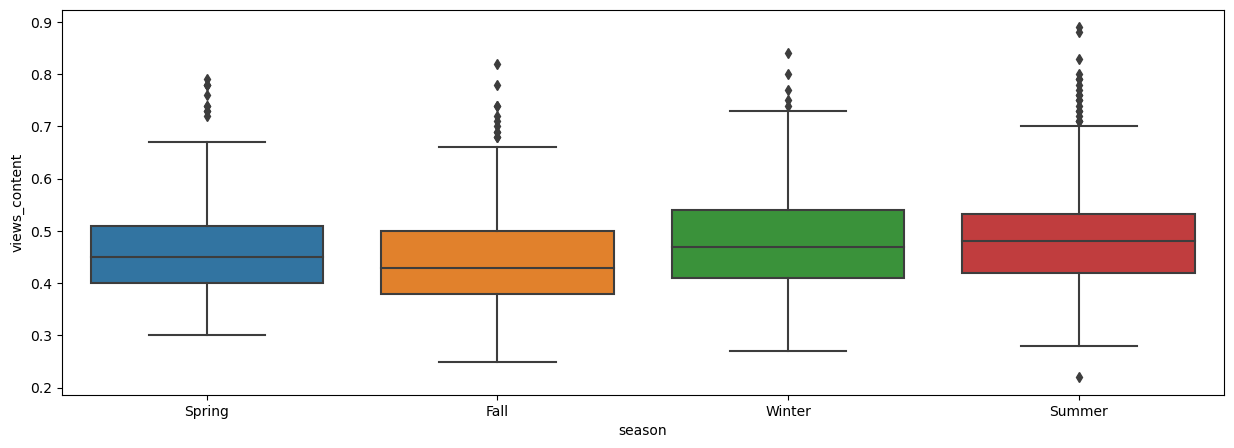

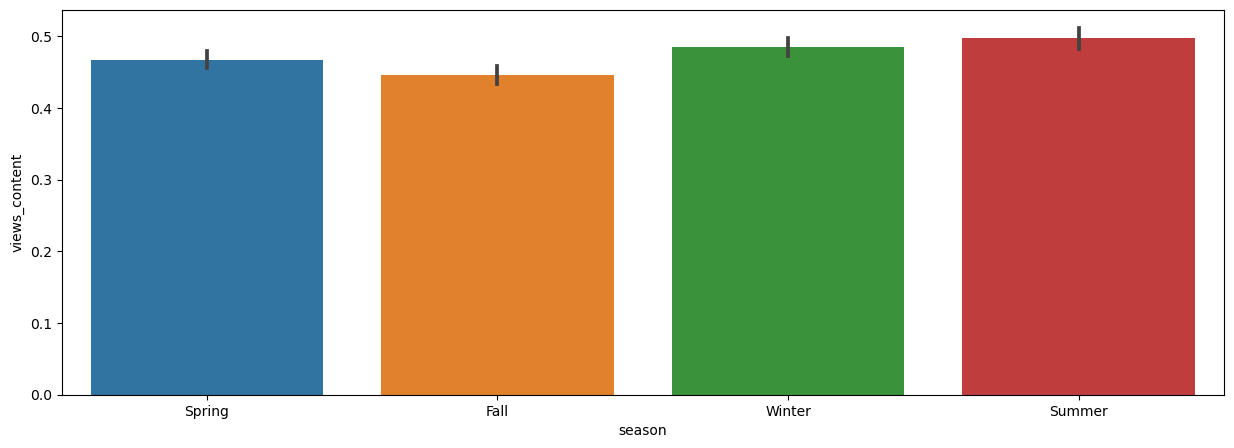

In [38]:
plt.figure(figsize=(15,5))
sns.boxplot(x = 'season', y = 'views_content', data = df);

plt.figure(figsize=(15,5))
sns.barplot(x = 'season', y = 'views_content', data = df);

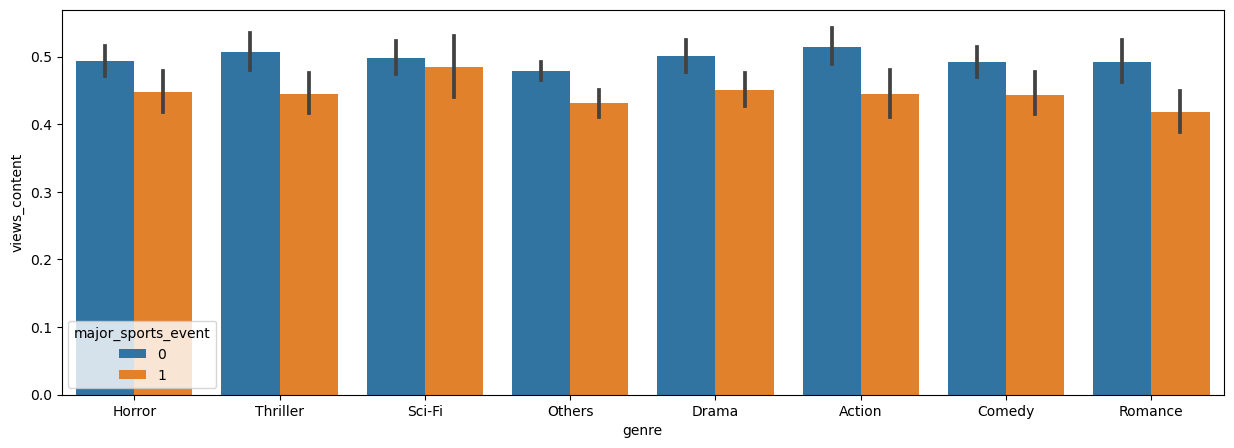

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="genre", y="views_content", hue="major_sports_event");

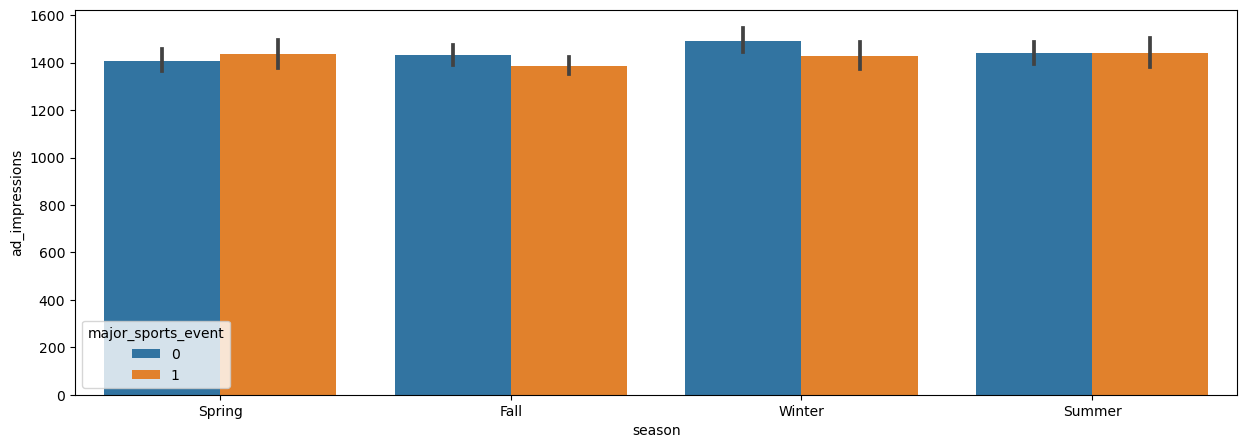

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x="season", y="ad_impressions", hue="major_sports_event");

### Data preparation for modelling

In [48]:
df_2 = df.copy()
df_2.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [86]:
X = df_2.drop(["views_content"], axis=1)
y = df_2["views_content"]

print('X dataset:')
print(X.head())
print('Y dataset:')
print(y.head())

X dataset:
   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
Y dataset:
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [49]:
X = sm.add_constant(X)

In [50]:
X = pd.get_dummies(
    X, columns=X.select_dtypes(include=['object', 'category']).columns.tolist(),
    drop_first=True,
)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1.0,1.46,1498.41,1,52.69,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.0,1.47,1079.19,1,48.74,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.0,1.85,1342.77,1,49.81,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.46,1498.41,0,55.83,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("No of rows in the train dataset is: ", X_train.shape[0])
print("No of rows in the test dataset is: ", y_test.shape[0])

No of rows in the train dataset is:  800
No of rows in the test dataset is:  200


In [52]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     142.3
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          5.42e-244
Time:                        18:20:11   Log-Likelihood:                 1281.4
No. Observations:                 800   AIC:                            -2521.
Df Residuals:                     779   BIC:                            -2422.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0568    

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.780**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    -  It is the Y-intercept. It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient. 
    - In our case, the value for const coefficient is **0.0568**

### Model Performance Check

In [53]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))



def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100



def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [55]:
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048768,0.038804,0.785143,0.779344,8.699754


In [56]:
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050511,0.039765,0.782777,0.757149,8.552658


**Observations**

- The training $R^2$ is 0.78, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict content views within a mean error of 0.39 on the test data

- MAPE of 8.5 on the test data means that we are able to predict within 8.6% of the content views

### TEST FOR MULTICOLLINEARITY

In [57]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [58]:
checking_vif(X_train)

,feature,VIF
0,const,99.990814
1,visitors,1.023823
2,ad_impressions,1.025293
3,major_sports_event,1.046651
4,views_trailer,1.026066
5,genre_Comedy,1.922381
6,genre_Drama,1.921975
7,genre_Horror,1.920715
8,genre_Others,2.660433
9,genre_Romance,1.828182


- No multicollinearity is present among the variables as all VIF values are below 5.

**Dealing with high p-value variables**

- If p-values are greater than 5, we will drop these variables.

In [59]:
predictors = X_train.copy()
cols = predictors.columns.tolist()

max_p_value = 1

while len(cols) > 0:
    X_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'major_sports_event', 'views_trailer', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [76]:
x_train1 = X_train[selected_features]
x_test1 = X_test[selected_features]

In [77]:
olsmod2 = sm.OLS(y_train, x_train1).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     281.1
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.37e-252
Time:                        20:39:06   Log-Likelihood:                 1273.4
No. Observations:                 800   AIC:                            -2525.
Df Residuals:                     789   BIC:                            -2473.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0788    

In [78]:
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train1, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.049256,0.039006,0.780826,0.777766,8.748261


In [79]:
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test1, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051381,0.040572,0.775231,0.76208,8.777297


### Test for lineraity and normality
**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [64]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
382,0.32,0.427399,-0.107399
994,0.60,0.638975,-0.038975
982,0.43,0.473510,-0.043510
47,0.60,0.529142,0.070858
521,0.42,0.379314,0.040686


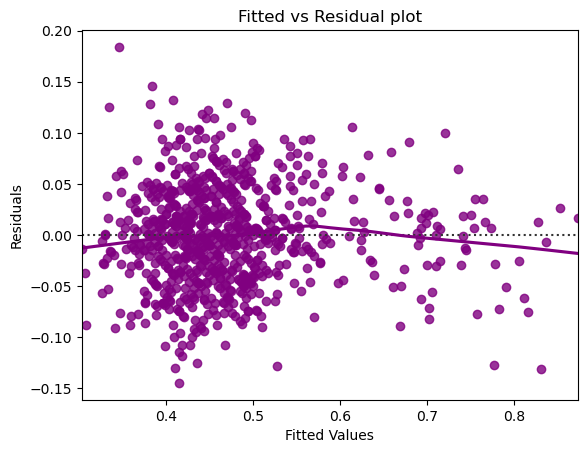

In [66]:
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

- If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

- **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### The shape of the histogram of residuals can give an initial idea about the normality.

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

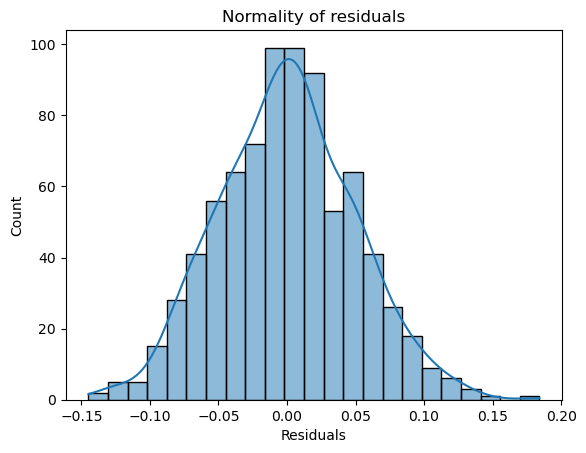

In [67]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

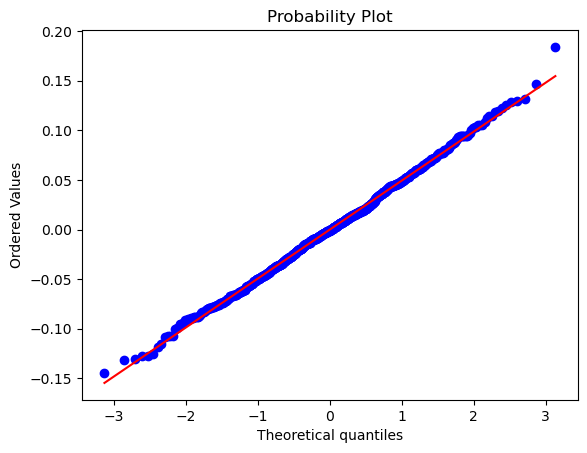

In [68]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [69]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9983111619949341, pvalue=0.6343223452568054)

- Since p-value > 0.05, the residuals are normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are normal.
- we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

### Test for Homoscedascity
**Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

**Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [70]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train1)
lzip(name, test)

[('F statistic', 0.993122491380643), ('p-value', 0.5271124946442365)]

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

### Predictions on test data
- Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [71]:
pred = olsmod2.predict(x_test1)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
486,0.38,0.415153
872,0.41,0.465226
404,0.31,0.361766
911,0.40,0.373442
531,0.40,0.487841
608,0.34,0.425860
671,0.37,0.477397
242,0.50,0.481895
374,0.76,0.632836
797,0.49,0.461135


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

### Final Model
- Let's recreate the final model and print it's summary to gain insights.

In [72]:
x_train_final = x_train1.copy()
x_test_final = x_test1.copy()

In [73]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     281.1
Date:                Sun, 04 Aug 2024   Prob (F-statistic):          3.37e-252
Time:                        18:35:27   Log-Likelihood:                 1273.4
No. Observations:                 800   AIC:                            -2525.
Df Residuals:                     789   BIC:                            -2473.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0788    

In [89]:
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.049256,0.039006,0.780826,0.777766,8.748261


In [90]:
print("Testing Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051381,0.040572,0.775231,0.76208,8.777297


* The model is able to explain ~78% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 8.8% of the anime ratings

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

- The model is able to explain ~78% of the variation in the data and within 8.7% of the content views on the test data, which is good.
- This indicates that the model is good for prediction as well as inference purposes
- If the visitors increases by one unit, then its content views increases by 0.1253 units.
- If the number of trailer views increases by one unit, then its content views increases by 0.0024 units.
- If there is an major sports events happening, then content views decreases by 0.0605 units.